# Applied Machine Learning Project 2

The data which will be used in this report relates to fall data collected for elderly patients in Chinese hospitals in 2017. The goal of the collection was to use machine learning algorithms in order to better predict if a fall occurred based on factors which include monitoring time (TIME), sugar level (SL), EEG monitoring rate (EEG), blood pressure (BP), heart rate (HR), and blood circulation (CIRCULATION). Other activities which the elderly patient could have been doing include sitting, running, standing, walking, and experiencing cramps.

In [1]:
import pandas as pd

from knn import _knn
from logistic import _logistic
from SVM import _SVM

falldetection = pd.read_csv('data/falldetection.csv')
falldetection.head()

# create a mapping from activity label value to activity name to make results easier to interpret
lookup_fall_type = dict(zip(falldetection.ACTIVITY.unique(), falldetection.NAME.unique()))
print(lookup_fall_type)

X = falldetection[['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']]
y = falldetection['ACTIVITY']

{3: 'Falling', 2: 'Sitting', 4: 'Cramps', 5: 'Running', 0: 'Standing', 1: 'Walking'}


### Descriptive Statistics for Activities

In [11]:
grouped = falldetection.groupby(['ACTIVITY'])
print('Falling')
print(grouped.get_group(3).describe().transpose())

Falling
              count          mean           std         min        25%  \
ACTIVITY     3588.0      3.000000      0.000000      3.0000      3.000   
TIME         3588.0  11298.780872   5089.651088   2275.3000   7509.690   
SL           3588.0  73150.507061  96090.175491     42.2242  12049.675   
EEG          3588.0  -3427.379019  23858.490440 -15200.0000  -5060.000   
BP           3588.0     50.875139     33.833602      0.0000     25.000   
HR           3588.0    215.602285    122.750778     33.0000    128.000   
CIRCLUATION  3588.0   2913.524805   3197.441101      5.0000    689.000   

                  50%      75%        max  
ACTIVITY         3.00      3.0        3.0  
TIME         10124.15  13790.1    26626.3  
SL           39215.35  87765.5   480315.0  
EEG          -3110.00  -2240.0  1410000.0  
BP              42.00     73.0      207.0  
HR             196.00    254.0      540.0  
CIRCLUATION   1922.00   3630.0    15505.0  


In [14]:
print('Sitting')
print(grouped.get_group(2).describe().transpose())

Sitting
              count          mean           std         min        25%  \
ACTIVITY     2502.0      2.000000      0.000000      2.0000     2.0000   
TIME         2502.0   9171.394524   5044.732555   2120.9900  5327.4975   
SL           2502.0  49719.992019  85442.920210     45.7832  4226.5025   
EEG          2502.0  -3019.106534   2587.146486 -14500.0000 -4090.0000   
BP           2502.0     50.439648     35.353792      0.0000    20.0000   
HR           2502.0    168.487210    120.842569     33.0000    79.0000   
CIRCLUATION  2502.0   2040.336531   2996.234277      5.0000   292.0000   

                 50%        75%       max  
ACTIVITY        2.00      2.000       2.0  
TIME         7569.47  12218.275   26195.7  
SL           9759.73  60312.875  476183.0  
EEG         -2200.00  -1203.640   16900.0  
BP             42.00     75.000     170.0  
HR            128.00    235.000     537.0  
CIRCLUATION   587.00   2904.000   15505.0  


In [15]:
print('Cramps')
print(grouped.get_group(4).describe().transpose())

Cramps
              count          mean            std         min        25%  \
ACTIVITY     3494.0      4.000000       0.000000      4.0000      4.000   
TIME         3494.0  10625.172473    4630.339517   1954.2300   7781.500   
SL           3494.0  64601.728156  107348.077830     43.5905  11200.725   
EEG          3494.0  -3582.574165    4829.187887 -15700.0000  -4402.315   
BP           3494.0     57.140527      37.540527      0.0000     28.000   
HR           3494.0    200.231254     114.631888     33.0000    131.000   
CIRCLUATION  3494.0   2639.249857    3668.383432      5.0000    654.000   

                  50%        75%       max  
ACTIVITY         4.00      4.000       4.0  
TIME          9577.39  12785.600   26869.9  
SL           27563.65  59080.075  521716.0  
EEG          -3069.75  -2252.050  144000.0  
BP              47.00     78.000     210.0  
HR             174.00    224.000     540.0  
CIRCLUATION   1415.00   2754.000   18067.0  


In [16]:
print('Running')
print(grouped.get_group(5).describe().transpose())

Running
              count          mean           std       min        25%  \
ACTIVITY     1688.0      5.000000      0.000000      5.00     5.0000   
TIME         1688.0  10335.788928   4322.711886   2017.36  7902.4925   
SL           1688.0  51029.679139  73635.567754     48.09  9506.2800   
EEG          1688.0  -3643.622706   2234.911028 -13400.00 -4912.5000   
BP           1688.0     56.203199     35.380926      0.00    31.0000   
HR           1688.0    192.721564    100.769944     33.00   130.0000   
CIRCLUATION  1688.0   2180.790877   2451.938221      5.00   517.0000   

                  50%        75%       max  
ACTIVITY         5.00      5.000       5.0  
TIME          9472.36  12443.825   27054.1  
SL           30372.85  53891.325  482830.0  
EEG          -3254.80  -2088.570    4950.0  
BP              46.00     75.000     186.0  
HR             179.00    262.000     540.0  
CIRCLUATION   1747.00   2599.000   15505.0  


In [17]:
print('Standing')
print(grouped.get_group(0).describe().transpose())

Standing
              count           mean            std          min        25%  \
ACTIVITY     4608.0       0.000000       0.000000         0.00      0.000   
TIME         4608.0   12543.674844    5798.501807      3294.91   8327.865   
SL           4608.0  114014.777984  182580.512608       409.00  16383.750   
EEG          4608.0  -11379.093705  202805.737218 -12626000.00  -8033.750   
BP           4608.0      71.780599      68.286376         0.00     27.000   
HR           4608.0     257.389323     147.490512        35.00    146.000   
CIRCLUATION  4608.0    4012.220703    4933.138211        35.00    889.000   

                 50%         75%        max  
ACTIVITY         0.0       0.000        0.0  
TIME         11316.5   15348.575    50895.5  
SL           51477.5  133551.500  2426140.0  
EEG          -5280.0   -3210.000      -90.0  
BP              50.0      90.000      533.0  
HR             224.5     332.000      986.0  
CIRCLUATION   2321.0    5250.750    52210.0  


In [18]:
print('Walking')
print(grouped.get_group(1).describe().transpose())

Walking
             count          mean           std        min        25%  \
ACTIVITY     502.0      1.000000      0.000000     1.0000     1.0000   
TIME         502.0   6589.801972   3156.975433  2202.3900  4150.3050   
SL           502.0  17939.247519  26117.679770    46.0085  2263.4125   
EEG          502.0  -2253.429010   1763.409645 -5880.0000 -4196.9825   
BP           502.0     40.326693     46.660031     0.0000    14.0000   
HR           502.0    118.109562     77.320121    33.0000    54.0000   
CIRCLUATION  502.0    927.143426   1246.900139     5.0000   165.0000   

                  50%         75%       max  
ACTIVITY        1.000      1.0000       1.0  
TIME         5725.915   9208.0625   18117.0  
SL           4770.050  17210.6250  143758.0  
EEG         -1435.000   -919.7500    -119.0  
BP             21.000     35.0000     150.0  
HR             85.000    183.0000     449.0  
CIRCLUATION   343.000    931.0000    5537.0  


## Comparison of KNN, Logistic Regression, and SVM

The specific algorithms which we will be comparing today are KNN, logistic regression, and support vector machines. Since KNN was covered in the previous project, I won't talk about it here.

**Logistic regression** deals with modeling the probability of either/or situations. In this case, we are seeking to model and predict the probability that an elderly individual fell when given different associated attributes. 

**SVM** is a supervised machine learning algorithm that seeks to classify data by using support vectors. The margin between these vectors is called a hyperplane, which serves as a soft-margin to differentiate between two classes. In this case, the person fell or the person did not fall.

### Algorithm 1: KNN

__KNN__


/home/lzark/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/lzark/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/lzark/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/lzark/.local/lib/python3.6/site-packages/pandas

The prediction [3 0 2 4 4 5 4 3 4 5 4 4 0 0 4 0 3 0 0 4 4 2 0 2 3 3 3 0 5 5 2 4 0 5 0 5 0
 5 2 0 2 3 3 4 3 2 2 0 0 4 2 2 2 0 1 0 0 4 1 0 5 2 0 3 3 0 5 2 0 0 4 2 0 2
 0 3 2 4 2 2 2 5 2 5 4 0 3 3 2 3 5 3 0 3 3 5 4 0 2 3 4 0 0 4 3 5 2 0 0 0 2
 0 3 0 2 3 2 4 3 0 3 0 5 3 2 3 2 4 2 0 4 3 0 2 0 0 2 2 0 2 3 0 2 3 1 0 3 0
 3 0 4 0 2 4 4 3 4 4 5 0 0 0 0 2 3 0 3 2 0 0 2 4 1 0 0 0 0 4 2 0 0 0 2 4 4
 3 4 0 1 4 0 5 4 2 4 3 3 5 0 3 4 4 3 0 0 0 4 4 0 0 4 4 2 4 0 0 0 0 0 2 4 0
 3 5 2 3 2 0 2 2 4 0 3 0 2 5 3 3 3 0 4 3 3 3 0 4 1 3 1 3 2 4 4 5 0 4 3 3 3
 2 4 0 4 4 0 2 1 0 2 0 0 2 4 0 4 0 1 1 0 3 2 0 0 0 3 4 3 3 0 3 0 4 0 3 5 4
 3 0 5 5 2 0 0 0 0 4 0 3 3 5 3 0 2 5 3 4 0 0 3 2 3 3 3 3 5 0 5 2 2 0 0 5 4
 5 0 1 3 4 1 4 3 3 4 0 0 3 3 4 2 1 3 4 3 4 4 0 0 2 3 0 4 3 0 2 4 3 4 0 0 4
 3 0 0 0 2 1 5 2 2 2 2 4 0 4 3 4 4 4 0 4 4 3 2 4 0 4 3 3 2 3 2 5 0 4 0 3 3
 0 2 4 5 3 0 5 0 4 0 4 2 3 3 5 1 3 4 4 4 0 4 2 5 4 4 4 2 0 5 4 0 3 5 4 3 4
 0 0 3 2 3 0 4 0 3 2 3 0 4 3 3 3 4 3 4 4 3 3 3 0 5 3 3 3 2 4 4 5 0 2 2 0 3
 3 0 3 0 2

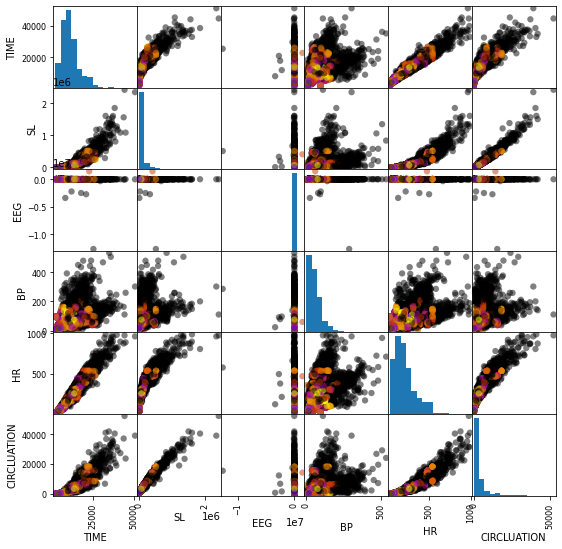

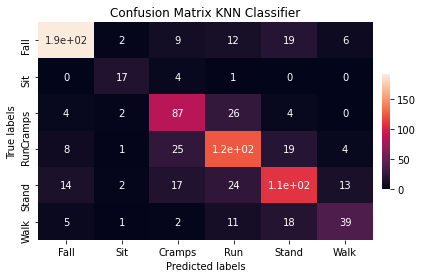

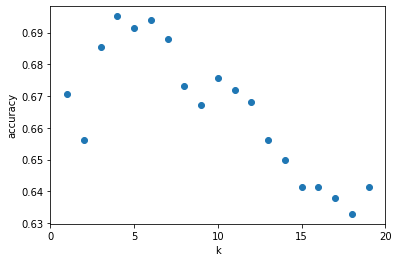

In [3]:
_knn(X, y)

From our accuracy chart, it would appear that using 4-nearest neighbors produces the best results for predicting the activity classification.

### Algorithm 2: Logistic Regression


__logistic regression__


/home/lzark/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


lr.coef_: [[-1.83132130e-04  1.89791221e-06 -6.99272692e-04  5.76036329e-06
  -2.29210607e-07 -1.70354820e-04]
 [-1.46249524e-04 -4.17803624e-06  2.21936493e-05 -7.24698297e-07
  -9.75651741e-07  1.06595740e-05]
 [ 7.91550870e-05  1.73274899e-06  1.93775377e-04  1.47590065e-06
  -1.29944798e-06  7.88557214e-06]
 [ 1.20311986e-04  3.85178955e-07  2.09919915e-04 -8.92534949e-06
   1.65923666e-06  6.51631808e-05]
 [ 1.27271879e-04 -7.53547065e-07  2.23514615e-04  2.32725472e-06
   1.26730438e-07  7.00754282e-05]
 [ 2.64270192e-06  9.15743147e-07  4.98691368e-05  8.65291255e-08
   7.18343230e-07  1.65710653e-05]]
lr.intercept_: [-7.71181032e-09 -1.36495457e-08  7.77112291e-08 -2.74910021e-08
  1.99783431e-08 -4.88372141e-08]
Training set score: 0.38
Test set score: 0.37
Cramps
The prediction [4 4 0 ... 3 3 4]

Logistic Regression Confusion Matrix:
[[827   0   0 113 194   0]
 [ 36   0   0   4  77   0]
 [141   0   0 100 344   0]
 [271   0   0 306 370   0]
 [277   0   0 232 387   0]
 [171   0

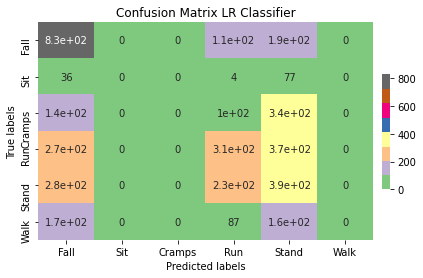

In [2]:
_logistic(X, y, lookup_fall_type)

When we compare the confusion matrix from KNN with the confusion matrix from logistic regression, we can see that logistic regression proves to better predict whether an activity that occurred was a fall or was not a fall. However, KNN is better at predicting the type of activity that occurred (not just related to fall or not fall).

### Algorithm 3: SVM


__SVM__


/home/lzark/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/lzark/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/lzark/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/lzark/.local/lib/python3.6/site-packages/pandas

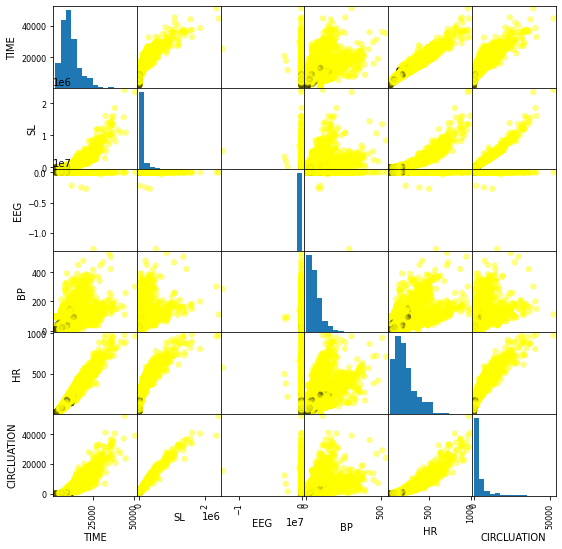

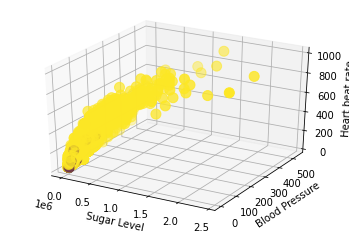

/home/lzark/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM Training set score: 80.70%
Linear SVM Test set score: 81.10%
[[ 3.41566510e-04 -1.31283709e-04 -7.60562273e-05  9.99726611e-03
  -1.59188385e-02  3.04170953e-03]]
[-0.00178136]

Linear SVM Confusion Matrix:
[[   0  117]
 [ 657 3322]] 

SVM Poly Training set score: 96.87%
SVM Poly Test set score: 97.14%

NONLinear SVM Confusion Matrix:
[[   0  117]
 [   0 3979]] 

SVM Gaussian Training set score: 96.87%
SVM Gaussian Test set score: 97.14%

NONLinear SVM Confusion Matrix:
[[   0  117]
 [   0 3979]] 

SVM Gaussian Training set score: 36.29%
SVM Gaussian Test set score: 34.72%

Linear SVM Confusion Matrix:
[[752   0   0  32 350   0]
 [ 34   0   0   0  83   0]
 [105   0   0  32 448   0]
 [298   0   0  85 564   0]
 [266   0   0  45 585   0]
 [145   0   0  13 259   0]] 



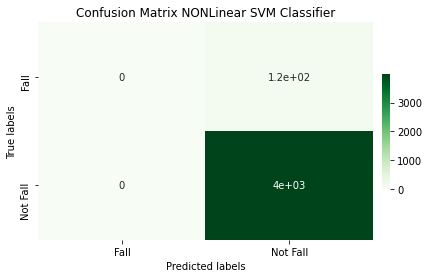

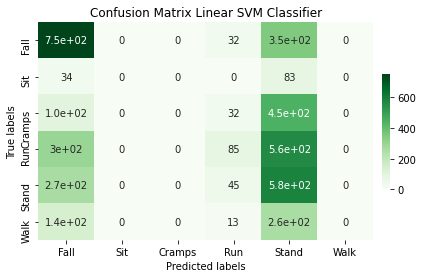

In [2]:
_SVM(X, y)

Since logistic regression appears to be a better predictor than KNN for the choice of fall/not fall, I want to look at how SVM compares. In this cases, one can see that the linear implementation of SVM does not hold up to logistic regression in terms of both classification by fall/not fall and by general classification among the different activities. However, SVM does do better than KNN when classifying simply by fall/not fall criteria. On the other hand, KNN is better at classifying by general activities than both logistic regression and SVM. This is because logistic regression and SVM both tended to classify non-fall related activities as "Standing" whereas KNN tended to have a more even distribution of wrongly classified activities.

### Concluding Remarks

Based on this analysis, I present logistic regression as the best fall/not fall predictor for the data which was presented. SVM closely follows logistic regression in this classification, and KNN comes up last in the lineup. However if an analyst wished to, instead, consider all of the activities that the patient could have been doing, an approach using KNN would be better for classification than either logistic regression or SVM.